In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# Load the dataset
# dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
# df = pd.read_excel(dataset_url)

df = pd.read_excel('/Users/shyammenon/Documents/School/Colorado Data Science/Unsupervised Machine Learning/Week 5 - Final Project/Online Retail.xlsx')

## Data Overview

In [3]:
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


None

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data Cleaning

In [4]:
# Remove missing values
df.dropna(subset=["CustomerID"], inplace=True)

# Remove negative or zero quantity and unit prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


 ## Exploratory Data Analysis (EDA)

#### Summary statistics

In [5]:
display(df.describe())

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


#### Distribution of Unit Price


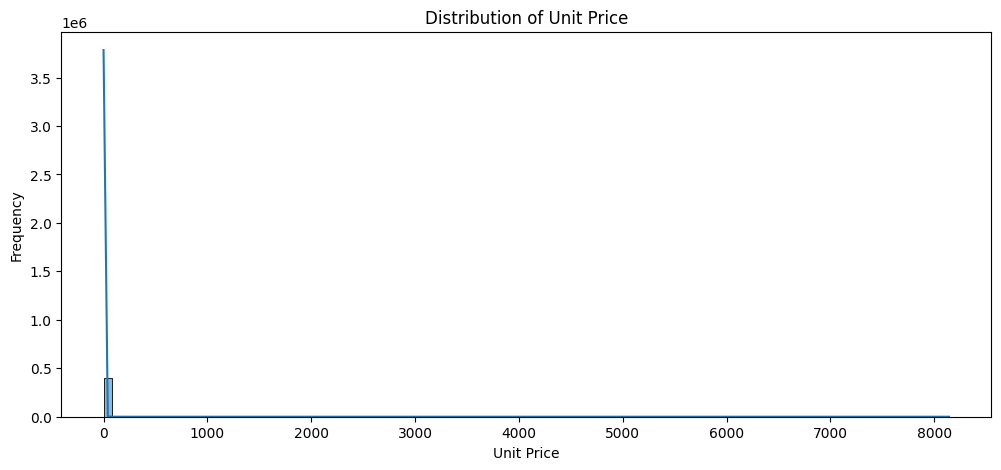

In [6]:
plt.figure(figsize=(12, 5))
sns.histplot(df["UnitPrice"], bins=100, kde=True)
plt.title("Distribution of Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.show()

##### Discussion: Unit Price Distribution
The unit price distribution is right-skewed, indicating that most products are priced lower, while a few have significantly high prices. \
This suggests the presence of premium products in the dataset.

#### Distribution of Quantity Purchased


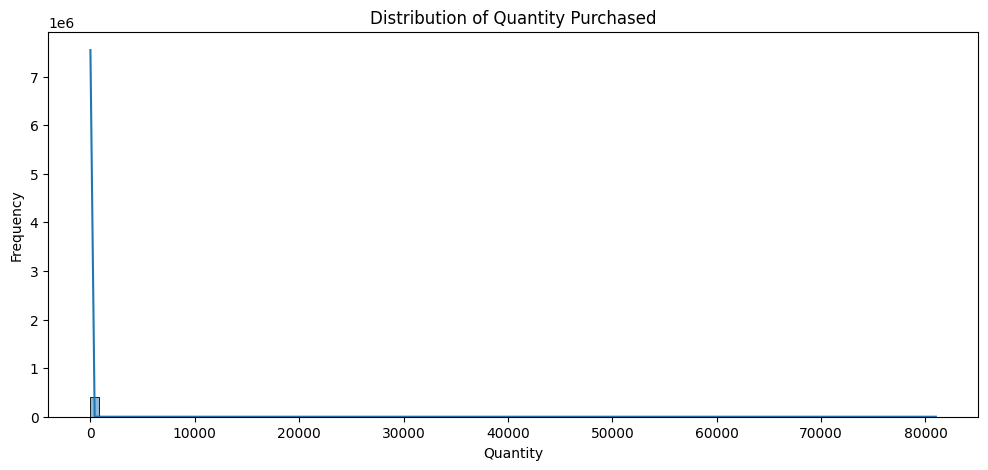

In [7]:
plt.figure(figsize=(12, 5))
sns.histplot(df["Quantity"], bins=100, kde=True)
plt.title("Distribution of Quantity Purchased")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

##### Discussion: Quantity Purchased Distribution
The distribution of quantity purchased is highly skewed, meaning most transactions involve small quantities, but some involve bulk purchases. \
This aligns with typical retail patterns where some customers buy in bulk while most make small purchases.

#### Number of Unique Customers

In [8]:
print(f"Total unique customers: {df['CustomerID'].nunique()}")

Total unique customers: 4338


##### Discussion: Customer Base
A high number of unique customers suggests a wide reach of the business. This is useful for segmenting customers when clustering.

#### Monthly Sales Trend


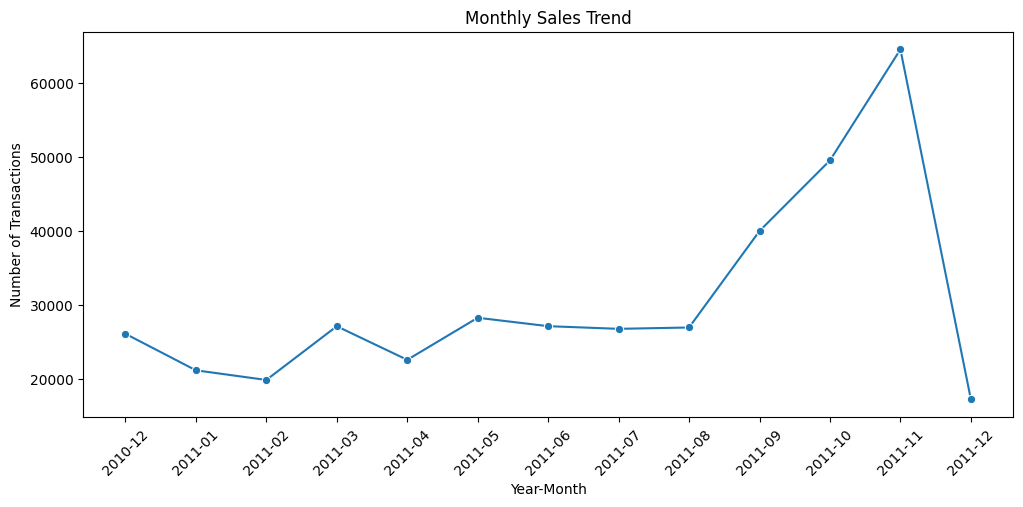

In [9]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth').agg({'InvoiceNo': 'count'}).reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_sales['YearMonth'].astype(str), y=monthly_sales['InvoiceNo'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Number of Transactions")
plt.show()

##### Discussion: Monthly Sales Trend
The sales trend shows seasonal variations. There are peaks and drops in transaction counts, which may be linked to holiday seasons or promotional campaigns.

#### Country-wise Distribution of Customers

/var/folders/f0/d_htcyxd6_51dr4xmk21j29c0000gn/T/ipykernel_58111/1291011262.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_counts.index, y=customer_counts.values, palette='viridis')


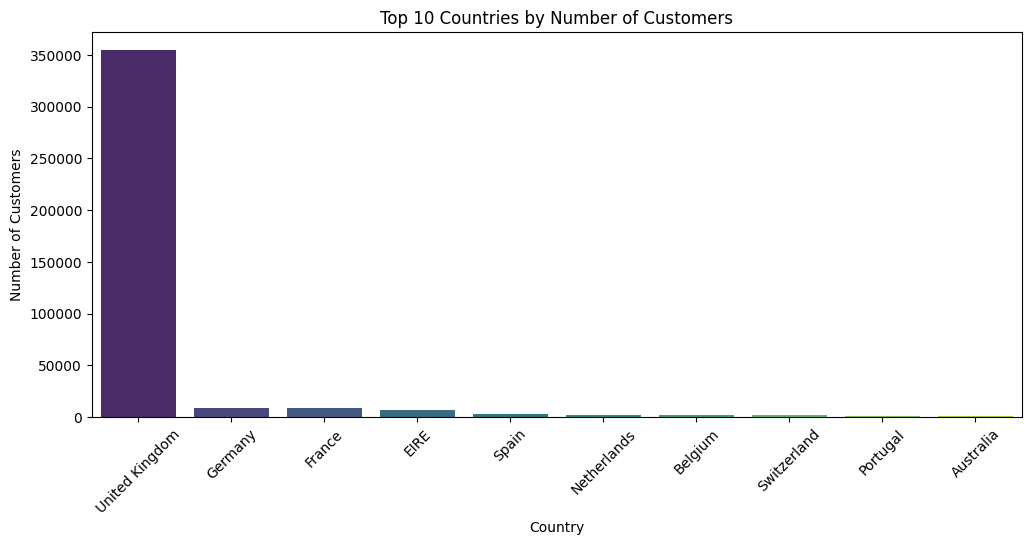

Country
United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Netherlands         2359
Belgium             2031
Switzerland         1841
Portugal            1462
Australia           1182
Name: count, dtype: int64


In [10]:
plt.figure(figsize=(12, 5))
customer_counts = df['Country'].value_counts().head(10)
sns.barplot(x=customer_counts.index, y=customer_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Number of Customers")
plt.xlabel("Country")
plt.ylabel("Number of Customers")
plt.show()
print(customer_counts.head(10))

##### Discussion: Country-Wise Customer Distribution
The majority of customers are from the UK, suggesting that the business has a strong domestic market, with some international reach. \
This may influence clustering analysis as regional customer behavior might differ.

#### Country-wise Sales Volume Distribution

/var/folders/f0/d_htcyxd6_51dr4xmk21j29c0000gn/T/ipykernel_58111/2297256540.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_quant.index, y=country_quant.values, palette='viridis')


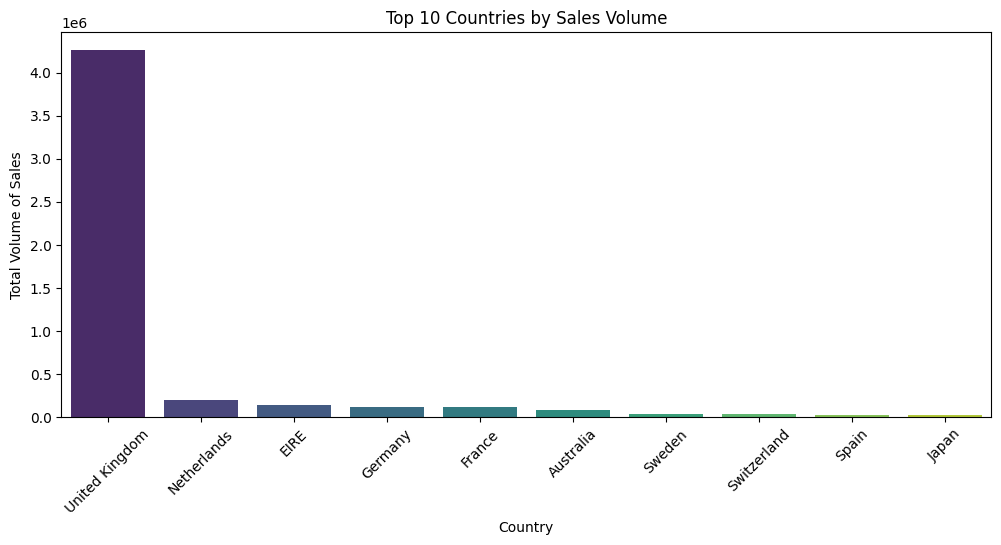

Country
United Kingdom    4256740
Netherlands        200361
EIRE               140275
Germany            119261
France             111471
Australia           83901
Sweden              36083
Switzerland         30082
Spain               27940
Japan               26016
Name: Quantity, dtype: int64


In [11]:
plt.figure(figsize=(12, 5))
country_quant = df.groupby('Country')['Quantity'].sum().nlargest(10)
sns.barplot(x=country_quant.index, y=country_quant.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Sales Volume")
plt.xlabel("Country")
plt.ylabel("Total Volume of Sales")
plt.show()
print(country_quant.head(10))

##### Discussion: Country-Wise Sales Volume Distribution
The majority of sales volume are from the UK, suggesting that the business has a strong domestic market, with some international reach. \
Majority of the top countries, for sales total volume, were located in Europe. It was interesting to see Japan in the top 10. 

## Feature Engineering: Aggregate data by CustomerID


In [12]:
customer_df = df.groupby("CustomerID").agg({
    "InvoiceNo": "nunique",  # Number of purchases
    "Quantity": "sum",  # Total quantity purchased
    "UnitPrice": "mean",  # Average price of items bought
    "Country": "first"  # Customer location
}).reset_index()

# Convert categorical feature (Country) into numerical

In [13]:
dummy_countries = pd.get_dummies(customer_df["Country"], drop_first=True, dtype=int)
customer_df = pd.concat([customer_df, dummy_countries], axis=1)
customer_df.drop(columns=["Country", "CustomerID"], inplace=True)

In [14]:
customer_df.columns

Index(['InvoiceNo', 'Quantity', 'UnitPrice', 'Austria', 'Bahrain', 'Belgium',
       'Brazil', 'Canada', 'Channel Islands', 'Cyprus', 'Czech Republic',
       'Denmark', 'EIRE', 'European Community', 'Finland', 'France', 'Germany',
       'Greece', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania',
       'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA',
       'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'USA',
       'United Arab Emirates', 'United Kingdom', 'Unspecified'],
      dtype='object')

# Data Standardization

Since our data is skewed, it is important to normalize the data using StandardScaler()

In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_df)

## Dimensionality Reduction using PCA


In [16]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

## Finding Optimal Number of Clusters (Elbow Method & Silhouette Score)

In [17]:
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Testing k from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_data, kmeans.labels_))

## Plot Elbow Method


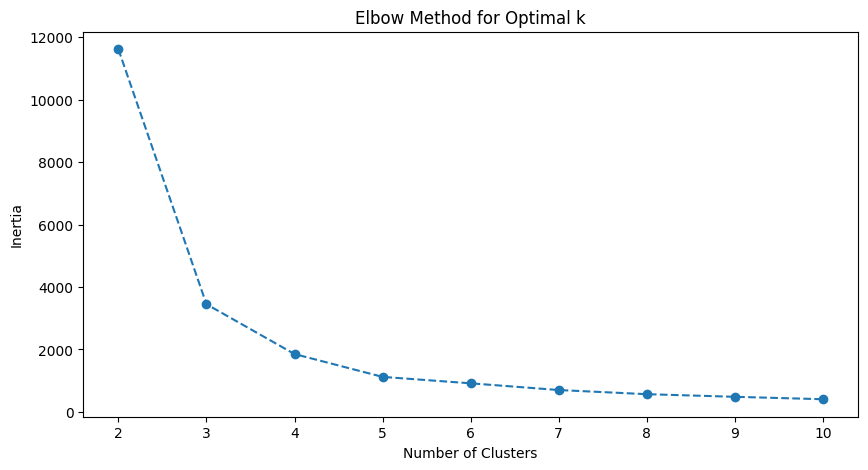

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

## Plot Silhouette Scores


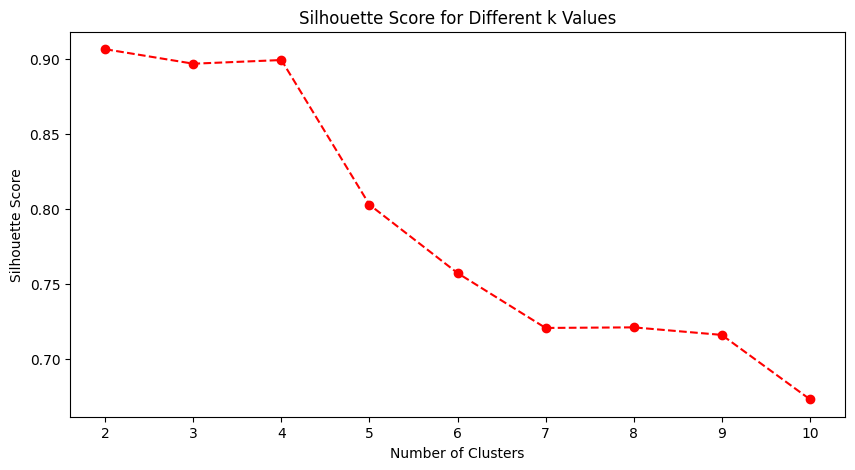

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='red')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k Values")
plt.show()

## K-Means Clustering


In [20]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(pca_data)
customer_df["Cluster"] = kmeans.labels_

In [21]:
customer_df

,InvoiceNo,Quantity,UnitPrice,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,...,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified,Cluster
0,1,74215,1.040000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,7,2458,2.644011,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,4,2341,5.764839,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1,631,8.289041,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,1,197,3.841176,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,1,45,4.765000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4334,1,54,5.622857,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4335,2,103,5.199167,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4336,16,1397,1.614987,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Summary and Discussion


In [22]:
display(customer_df.groupby("Cluster").mean())

,InvoiceNo,Quantity,UnitPrice,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
Cluster,,,,,,,,,,,,,,,,,,,,,
0,3.910164,852.350616,4.461895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
1,55.269231,39056.961538,3.711331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.923077,0.000000
2,3.709443,1202.198547,4.576816,0.021792,0.004843,0.058111,0.002421,0.009685,0.021792,0.016949,...,0.002421,0.002421,0.002421,0.067797,0.01937,0.048426,0.009685,0.004843,0.000000,0.009685
3,109.666667,111688.333333,3.644813,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Discussion: Clustering Results
The clustering analysis identified distinct customer segments based on purchasing behavior. \
The optimal cluster count, determined using the elbow method and silhouette scores, suggests that customers can be grouped effectively. \
These clusters help businesses tailor marketing and sales strategies based on customer segments.

This analysis provided valuable insights into customer purchasing patterns using unsupervised learning. \
Data preprocessing and EDA highlighted key trends, and clustering helped categorize customers. \
These findings can be leveraged for targeted marketing, inventory planning, and customer retention strategies.